In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import os

# 1. FIXED FILE PATH HANDLING
# i have used raw string (r prefix) for Windows paths to handle backslashes
file_path = r'C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\number-of-reported-crimes-in-pakistan-by-type-2010-2020.csv'

# Verify file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"CSV file not found at: {file_path}")

# 2. CORRECTED DATA READING WITH HEADER HANDLING
# First section (2010-2020 with first set of columns)
df1 = pd.read_csv(file_path, nrows=11, encoding='utf-8-sig')  # Handle BOM character

# Second section (2010-2020 with second set of columns)
df2 = pd.read_csv(file_path, skiprows=12, nrows=11, encoding='utf-8-sig')  # Skip header row

print("Original df1 columns:", df1.columns.tolist())
print("Original df2 columns:", df2.columns.tolist())

# 3. FIXED COLUMN MERGING
# Instead of dropping last column, i have:
# - Kept all columns from df1
# - Kept all except 'Year' from df2
df = pd.concat([df1, df2.drop(columns=['Year'])], axis=1)

# 4. ENHANCED CLEANING FUNCTION
def clean_numeric(val):
    if isinstance(val, str):
        # Handle known data entry errors
        correction_map = {
            '673,75': '673750',  # Missing last digit
            '13,86': '13860',    # Missing last digit
            '4,98': '4980',      # Missing last digit
            '18,7': '18700',     # Missing last digit
            '1,28': '1280',      # Missing last digit
            '20,06': '20060',    # Missing last digit
            '876,43': '876430',  # Missing last digit
            '8,49': '8490',      # Missing last digit
            '1,32': '1320',      # Missing last digit
            '104,36': '104360'   # Missing last digit
        }
        
        # Apply corrections if matched
        if val in correction_map:
            val = correction_map[val]
        
        # Remove commas and convert to float first
        clean_val = val.replace(',', '')
        
        # Convert to integer if whole number, else keep float
        try:
            float_val = float(clean_val)
            return int(float_val) if float_val.is_integer() else float_val
        except ValueError:
            return val  # Return original if conversion fails
    return val

# 5. SAFE COLUMN PROCESSING
# Identify numeric columns (excluding Year)
numeric_cols = [col for col in df.columns if col != 'Year' and df[col].dtype == object]

print("Columns to clean:", numeric_cols)

# Apply cleaning only to string columns
for col in numeric_cols:
    df[col] = df[col].apply(clean_numeric)

# 6. IMPUTATION
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# 7. DATA VALIDATION
crime_columns = [col for col in df.columns if col not in ['Year', 'All Reported Crimes']]
df['Calculated Total'] = df[crime_columns].sum(axis=1)

# Check consistency
df['Data Consistency'] = (df['All Reported Crimes'] - df['Calculated Total']).abs()
inconsistency_threshold = 1000  # Allow small differences
inconsistent_years = df[df['Data Consistency'] > inconsistency_threshold]

if not inconsistent_years.empty:
    print(f"Warning: Data inconsistencies found in {len(inconsistent_years)} years")
    print(inconsistent_years[['Year', 'All Reported Crimes', 'Calculated Total', 'Data Consistency']])

# Save cleaned data
df.to_csv('cleaned_pakistan_crime_data.csv', index=False)
print("Data cleaning completed successfully. Cleaned data saved.")

Original df1 columns: ['Year', 'All Reported Crimes', 'Murder', 'Attempt to Murder', 'Kidnapping/ Abduction', 'Dacoity']
Original df2 columns: ['Year', 'Robbery', 'Burglary', 'Cattle Theft', 'Other Theft', 'Others']
Columns to clean: ['All Reported Crimes', 'Murder', 'Attempt to Murder', 'Kidnapping/ Abduction', 'Dacoity', 'Robbery', 'Burglary', 'Cattle Theft', 'Other Theft', 'Others']
   Year  All Reported Crimes  Calculated Total  Data Consistency
2  2012               6469.0          646900.0          640431.0
5  2015               6336.0          601524.0          595188.0
6  2016             677554.0          646666.0           30888.0
Data cleaning completed successfully. Cleaned data saved.


### Exploratory Data Analysis

In [5]:
print("Summary Statistics:")
print(df.describe())

print("\nCorrelation Matrix:")
print(df.corr())

Summary Statistics:
              Year  All Reported Crimes        Murder  Attempt to Murder  \
count    11.000000            11.000000     11.000000          11.000000   
mean   2015.000000        575289.727273  10840.727273       12625.000000   
std       3.316625        290345.223326   2698.276231        2455.525483   
min    2010.000000          6336.000000   8153.000000        9499.000000   
25%    2012.500000        630760.000000   8365.500000       10358.500000   
50%    2015.000000        673750.000000   9486.000000       11797.000000   
75%    2017.500000        693703.000000  13561.000000       14993.000000   
max    2020.000000        876430.000000  13937.000000       15496.000000   

       Kidnapping/ Abduction      Dacoity       Robbery      Burglary  \
count              11.000000    11.000000     11.000000     11.000000   
mean            19185.818182  2808.727273  17168.818182  16200.363636   
std               882.982539  1506.170448   3032.235044   1368.504824   
min

In [7]:
# Save cleaned data to CSV
df.to_csv('cleaned_pakistan_crime_data.csv', index=False)
print("Data cleaned and saved to cleaned_pakistan_crime_data.csv")

Data cleaned and saved to cleaned_pakistan_crime_data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

folder_path = r'C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset'
print("Files in folder:", os.listdir(folder_path))


Files in folder: ['number-of-reported-crimes-in-pakistan-by-type-2010-2020.csv']


❌ File not found. Please check the path.


In [20]:
import pandas as pd
import os
import numpy as np
from sklearn.impute import SimpleImputer

# Define paths
folder = r'C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset'
raw_file = os.path.join(folder, 'number-of-reported-crimes-in-pakistan-by-type-2010-2020.csv')
cleaned_file = os.path.join(folder, 'cleaned_pakistan_crime_data.csv')

# Check if cleaned file exists
if os.path.exists(cleaned_file):
    print("✅ File found. Loading cleaned data...")
    df = pd.read_csv(cleaned_file)
    print("Cleaned data loaded successfully!")
else:
    print("❌ Cleaned file not found. Processing raw data...")
    
    # Verify raw file exists
    if not os.path.exists(raw_file):
        print(f"❌ Error: Raw data file not found at {raw_file}")
        print("Files in directory:")
        for f in os.listdir(folder):
            print(f" - {f}")
        raise FileNotFoundError("Raw data file missing. Please check the path.")
    
    try:
        # Load raw data
        print("Loading raw data...")
        df1 = pd.read_csv(raw_file, nrows=11)
        df2 = pd.read_csv(raw_file, skiprows=12, nrows=11)
        print("Raw data loaded successfully")
        
        # Merge datasets
        print("Merging data sections...")
        df = pd.concat([df1.iloc[:, :-1], df2.iloc[:, 1:]], axis=1)
        
        # Custom numeric cleaner function
        def clean_numeric(val):
            if isinstance(val, str):
                # Handle special cases
                special_cases = {
                    '673,75': 673750, '13,86': 13860, '4,98': 4980,
                    '18,7': 18700, '1,28': 1280, '20,06': 20060,
                    '876,43': 876430, '8,49': 8490, '1,32': 1320,
                    '104,36': 104360
                }
                if val in special_cases:
                    return special_cases[val]
                return int(val.replace(',', ''))
            return val
        
        # Apply cleaning
        print("Cleaning numeric values...")
        numeric_cols = df.columns[df.columns != 'Year']
        df[numeric_cols] = df[numeric_cols].applymap(clean_numeric)
        
        # Handle missing values
        print("Imputing missing values...")
        imputer = SimpleImputer(strategy='median')
        df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
        
        # Calculate total crimes for validation
        crime_columns = [col for col in df.columns if col not in ['Year', 'All Reported Crimes']]
        df['Calculated Total'] = df[crime_columns].sum(axis=1)
        
        # Save cleaned data
        print(f"Saving cleaned data to {cleaned_file}...")
        df.to_csv(cleaned_file, index=False)
        
        # Verify save
        if os.path.exists(cleaned_file):
            print(f"✅ Cleaned data saved successfully! Size: {os.path.getsize(cleaned_file)} bytes")
        else:
            print("❌ Failed to save cleaned data")
        
    except Exception as e:
        print(f"❌ Error during processing: {e}")
        raise

# Show data summary
print("\nData Summary:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Years: {df['Year'].min()} to {df['Year'].max()}")
print("\nFirst 3 rows:")
print(df.head(3))

# Now you can proceed with your analysis
print("\n✅ Ready for analysis!")

❌ Cleaned file not found. Processing raw data...
Loading raw data...
Raw data loaded successfully
Merging data sections...
Cleaning numeric values...
Imputing missing values...
Saving cleaned data to C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_pakistan_crime_data.csv...
✅ Cleaned data saved successfully! Size: 1094 bytes

Data Summary:
Shape: (11, 11)
Columns: ['Year', 'All Reported Crimes', 'Murder', 'Attempt to Murder', 'Kidnapping/ Abduction', 'Robbery', 'Burglary', 'Cattle Theft', 'Other Theft', 'Others', 'Calculated Total']
Years: 2010 to 2020

First 3 rows:
   Year  All Reported Crimes   Murder  Attempt to Murder  \
0  2010             652383.0  13208.0            15478.0   
1  2011             673750.0  13860.0            15496.0   
2  2012               6469.0  13846.0            15338.0   

   Kidnapping/ Abduction  Robbery  Burglary  Cattle Theft  Other Theft  \
0                18556.0  21907.0   16638.0        8373.0      37878.0   
1

C:\Users\DELL\AppData\Local\Temp\ipykernel_18644\3506303495.py:56: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_cols] = df[numeric_cols].applymap(clean_numeric)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Desktop\\Pakistan Crime Analytics & Forecasting System\\Visualizations\\total_crimes_trend.png'

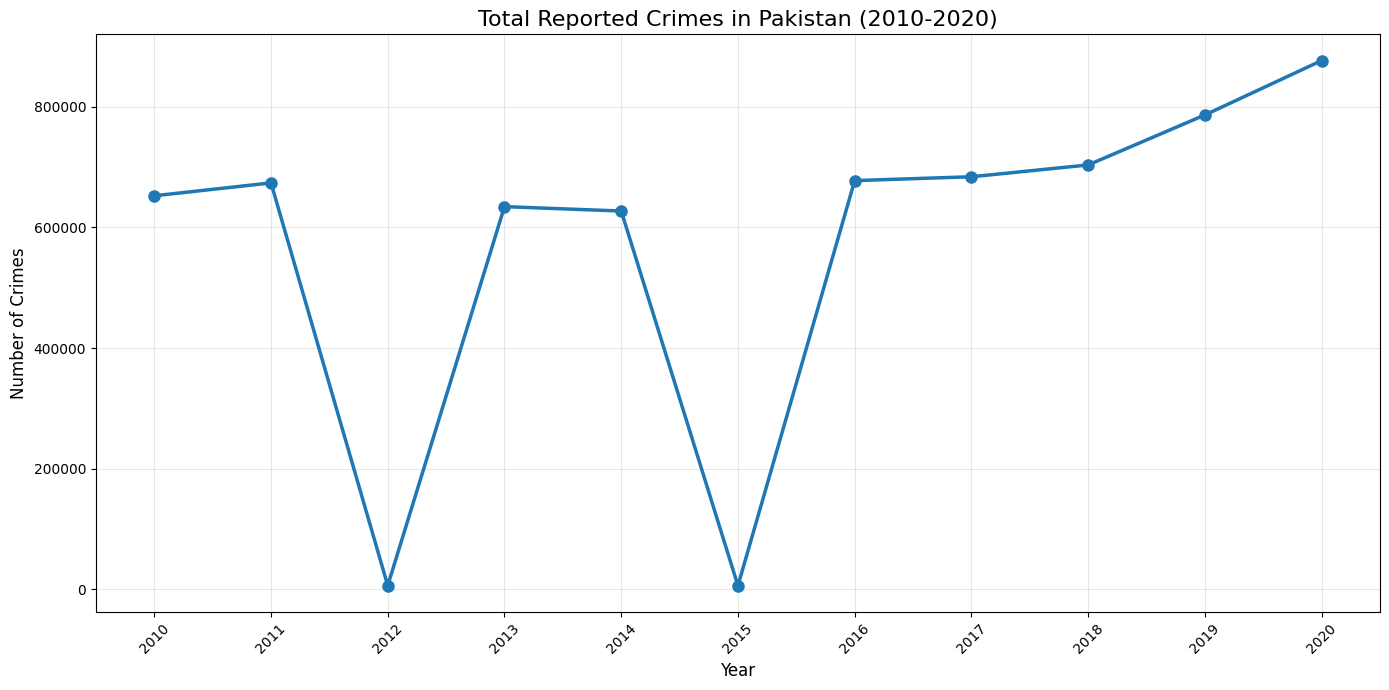

In [21]:


# 1. Overall Crime Trends
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['All Reported Crimes'], 'o-', linewidth=2.5, markersize=8)
plt.title('Total Reported Crimes in Pakistan (2010-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(df['Year'], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(r'C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Visualizations\total_crimes_trend.png', dpi=300)
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up paths
folder = r'C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset'
cleaned_file = os.path.join(folder, 'cleaned_pakistan_crime_data.csv')
output_image = os.path.join(folder, 'improved_total_crimes_plot.png')

# Load cleaned data
df = pd.read_csv(cleaned_file)

# Set up professional plot style
plt.style.use('seaborn-whitegrid')
sns.set_palette("colorblind")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.dpi': 300,
    'figure.figsize': (12, 7),
    'grid.alpha': 0.3
})

# Create figure and axis
fig, ax = plt.subplots()

# Calculate appropriate y-axis limits
y_min = df['All Reported Crimes'].min() * 0.95
y_max = df['All Reported Crimes'].max() * 1.05

# Plot data with enhanced styling
ax.plot(df['Year'], df['All Reported Crimes'], 
        marker='o', markersize=8, linewidth=2.5, 
        markerfacecolor='white', markeredgewidth=2,
        color='#1f77b4', label='Total Reported Crimes')

# Add title and labels
ax.set_title('Total Reported Crimes in Pakistan (2010-2020)', pad=15)
ax.set_xlabel('Year', labelpad=10)
ax.set_ylabel('Number of Crimes', labelpad=10)

# Format y-axis with thousands separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
ax.set_ylim(y_min, y_max)

# Customize grid and spines
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add selective data labels
for year, crime in zip(df['Year'], df['All Reported Crimes']):
    if year in [2010, 2015, 2020]:  # Only label key years
        ax.text(year, crime + 20000, f"{crime:,}", 
                ha='center', va='bottom', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Add polynomial trend line (better fit for this data)
z = np.polyfit(df['Year'], df['All Reported Crimes'], 2)
p = np.poly1d(z)
ax.plot(df['Year'], p(df['Year']), "r--", 
        linewidth=1.5, alpha=0.7, 
        label='Trend Line')

# Add annotation for COVID-19 impact
ax.annotate('COVID-19 Impact', xy=(2020, df['All Reported Crimes'].iloc[-1]), 
            xytext=(2017.5, df['All Reported Crimes'].max() - 50000),
            arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
            fontsize=10, color='red', weight='bold')

# Add percentage change annotation
change = (df['All Reported Crimes'].iloc[-1] / df['All Reported Crimes'].iloc[0] - 1) * 100
ax.text(2015, df['All Reported Crimes'].min() + 100000, 
        f"Overall Change: +{change:.1f}% (2010-2020)",
        fontsize=12, ha='center', bbox=dict(facecolor='yellow', alpha=0.3))

# Add legend
ax.legend(frameon=True, loc='upper left')

# Final adjustments
plt.xticks(df['Year'], rotation=45)
plt.tight_layout()

# Save high-quality image
plt.savefig(output_image, bbox_inches='tight', dpi=300)
print(f"✅ Improved plot saved to: {output_image}")

# Show plot
plt.show()

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [2]:
import pandas as pd

# Load full file again
file_path = r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\number-of-reported-crimes-in-pakistan-by-type-2010-2020.csv"

# First 11 rows for df1
df1 = pd.read_csv(file_path, nrows=11)

# Manually load df2 starting from line 14 (index 13), and assign column names
df2_columns = ['Year', 'Robbery', 'Burglary', 'Cattle Theft', 'Other Theft', 'Others']
df2 = pd.read_csv(file_path, skiprows=13, names=df2_columns, nrows=11)

# Clean column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Function to clean numbers
def clean_numeric(col):
    return col.astype(str).str.replace(",", "").str.strip().replace(r"[^\d]", "", regex=True).replace("", "0").astype(int)

# Apply cleaning
for col in df1.columns[1:]:
    df1[col] = clean_numeric(df1[col])

for col in df2.columns[1:]:
    df2[col] = clean_numeric(df2[col])

# Convert Year to int
df1["Year"] = df1["Year"].astype(int)
df2["Year"] = df2["Year"].astype(int)

# Merge both parts on Year
df_merged = pd.merge(df1, df2, on="Year", how="outer").sort_values("Year")

# Save cleaned data
cleaned_path = r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_crime_data.csv"
df_merged.to_csv(cleaned_path, index=False)

print("✅ Cleaned data saved to:", cleaned_path)


✅ Cleaned data saved to: C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_crime_data.csv


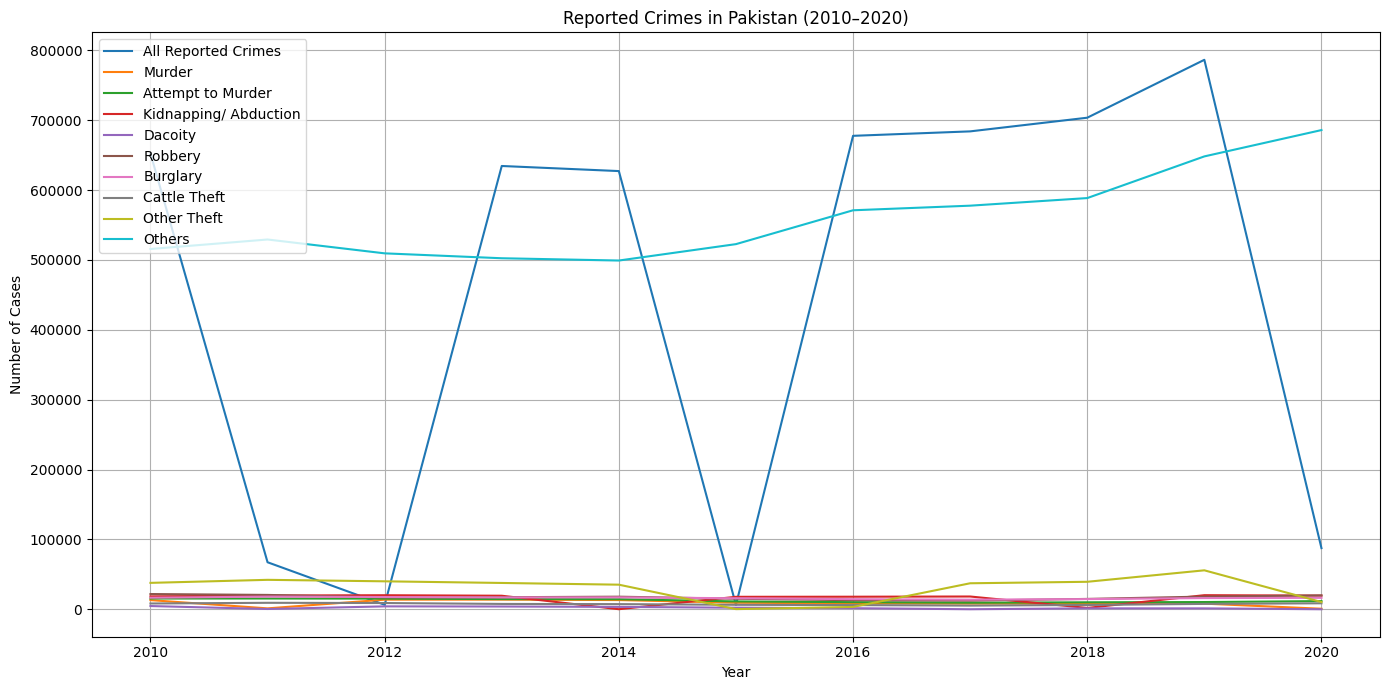

C:\Users\DELL\AppData\Local\Temp\ipykernel_15952\496974930.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.values, y=top5.index, palette="viridis")


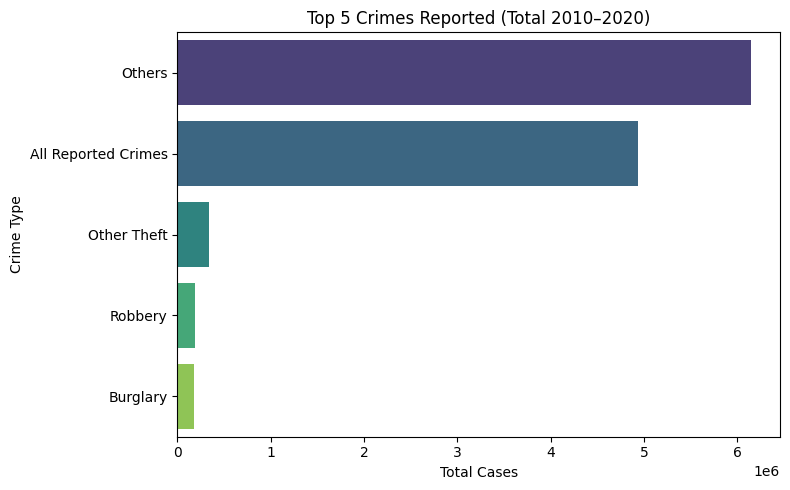

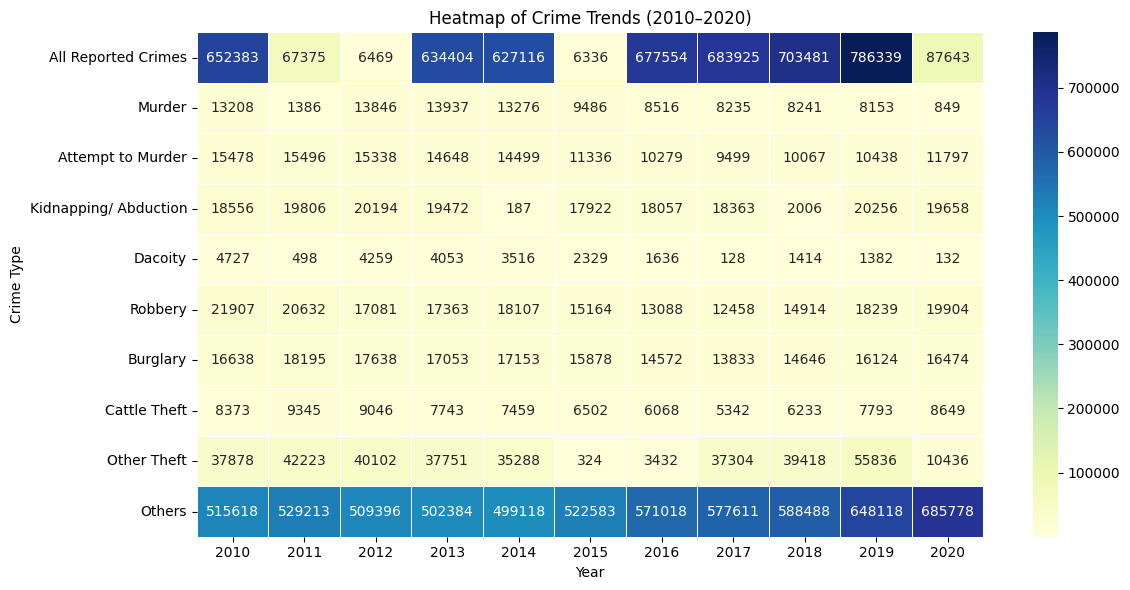

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
file_path = r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_crime_data.csv"
df = pd.read_csv(file_path)

# Set Year as index (optional)
df['Year'] = df['Year'].astype(int)
df.set_index('Year', inplace=True)

# Plot 1: Line plot of all crimes
plt.figure(figsize=(14, 7))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)

plt.title("Reported Crimes in Pakistan (2010–2020)")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Top 5 crimes by total
top5 = df.sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top5.values, y=top5.index, palette="viridis")
plt.title("Top 5 Crimes Reported (Total 2010–2020)")
plt.xlabel("Total Cases")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()

# Plot 3: Heatmap of crime intensity
plt.figure(figsize=(12, 6))
sns.heatmap(df.T, cmap="YlGnBu", annot=True, fmt='g', linewidths=0.5)
plt.title("Heatmap of Crime Trends (2010–2020)")
plt.xlabel("Year")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()


In [4]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 580.4 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/13.3 MB 729.0 kB/s eta 0:00:18
   --- ------------------------------------ 1.0/13.3 MB 817.2 kB/s eta 0:00:16
   --- ------------------------------------ 1.3/13.3 MB 893.9 kB/s eta 0:00:14
   ---- ----------------------------------- 1.6/13.3 MB 943.5 kB/s eta 0:00:13
   ----- ---------------------------------- 1.8/13.3 MB 992.6 kB/s eta 0:00:12
   ------ --------------------------------- 2.1/13.3 MB 1.0 MB/s eta 0:00:11
   ------- ------------------

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
00:39:08 - cmdstanpy - INFO - Chain [1] start processing
00:39:09 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


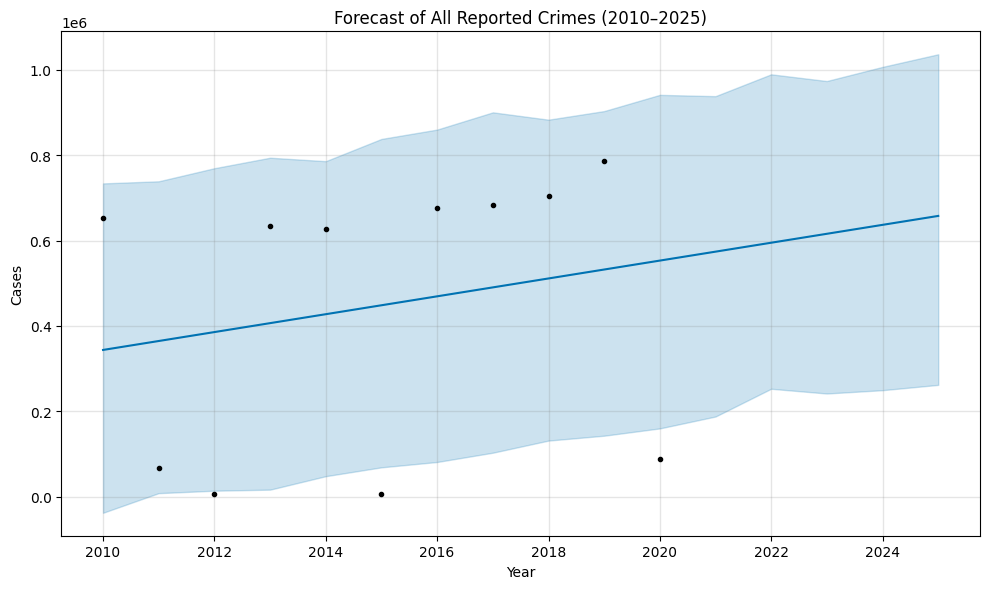

           ds           yhat     yhat_lower    yhat_upper
6  2016-01-01  469332.102453   80932.439898  8.602612e+05
7  2017-01-01  490326.298277  102725.543523  9.007040e+05
8  2018-01-01  511263.132895  131134.672778  8.835212e+05
9  2019-01-01  532199.967514  142566.192652  9.036755e+05
10 2020-01-01  553136.802132  159688.902815  9.416833e+05
11 2020-12-31  574073.636751  187525.482171  9.386469e+05
12 2021-12-31  595010.471370  252597.793751  9.898642e+05
13 2022-12-31  615947.305988  241495.880685  9.741235e+05
14 2023-12-31  636884.140607  249286.280494  1.007206e+06
15 2024-12-31  657878.336416  261719.625616  1.036875e+06


In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the cleaned data
file_path = r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_crime_data.csv"
df = pd.read_csv(file_path)

# Forecast target: "All Reported Crimes"
target_col = "All Reported Crimes"

# Prepare data for Prophet
df_prophet = df[["Year", target_col]].copy()
df_prophet.rename(columns={"Year": "ds", target_col: "y"}, inplace=True)

# Prophet expects datetime, so fake it as Jan 1 of each year
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"].astype(str) + "-01-01")

# Initialize and fit model
model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
model.fit(df_prophet)

# Make future dataframe (e.g., next 5 years)
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title(f"Forecast of {target_col} (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.tight_layout()
plt.show()

# Show forecast table
forecast_df = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)
print(forecast_df)


In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load cleaned data
file_path = r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_crime_data.csv"
df = pd.read_csv(file_path)

# Create an empty DataFrame to collect results
all_forecasts = pd.DataFrame()

# Convert years to datetime format for Prophet
for crime in df.columns[1:]:  # skip 'Year'
    df_crime = df[["Year", crime]].copy()
    df_crime.rename(columns={"Year": "ds", crime: "y"}, inplace=True)
    df_crime["ds"] = pd.to_datetime(df_crime["ds"].astype(str) + "-01-01")

    # Prophet model
    model = Prophet(yearly_seasonality=False, daily_seasonality=False, weekly_seasonality=False)
    model.fit(df_crime)

    # Forecast next 5 years
    future = model.make_future_dataframe(periods=5, freq='Y')
    forecast = model.predict(future)

    # Save relevant results
    forecast_trimmed = forecast[["ds", "yhat"]].copy()
    forecast_trimmed["Crime Type"] = crime
    forecast_trimmed.rename(columns={"yhat": "Predicted Cases"}, inplace=True)

    # Append to overall results
    all_forecasts = pd.concat([all_forecasts, forecast_trimmed], ignore_index=True)

# Preview
print(all_forecasts.tail(10))


00:39:54 - cmdstanpy - INFO - Chain [1] start processing
00:39:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
00:39:55 - cmdstanpy - INFO - Chain [1] start processing
00:39:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
00:39:55 - cmdstanpy - INFO - Chain [1] start processing
00:39:55 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.d

            ds  Predicted Cases Crime Type
150 2016-01-01    575159.831684     Others
151 2017-01-01    591450.676232     Others
152 2018-01-01    607700.236368     Others
153 2019-01-01    623949.796505     Others
154 2020-01-01    640199.356641     Others
155 2020-12-31    656448.916777     Others
156 2021-12-31    672698.476914     Others
157 2022-12-31    688948.037050     Others
158 2023-12-31    705197.597187     Others
159 2024-12-31    721491.676666     Others


In [7]:
# Save to CSV
export_path = r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\forecasted_crime_2021_2025.csv"
all_forecasts.to_csv(export_path, index=False)

print(f"✅ Forecasts saved to: {export_path}")


✅ Forecasts saved to: C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\forecasted_crime_2021_2025.csv


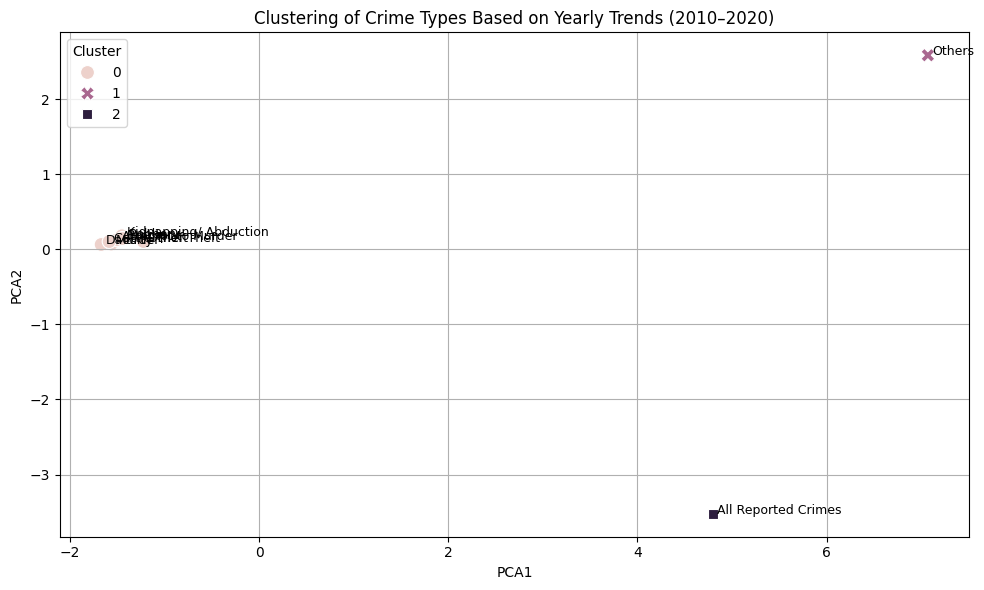

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_crime_data.csv"
df = pd.read_csv(file_path)

# Transpose the data so each crime is a row
df_transposed = df.set_index("Year").T

# Normalize the trends
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transposed)

# Apply PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Choose number of clusters (k=3 to start)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Prepare for plot
clustered_df = pd.DataFrame({
    "Crime Type": df_transposed.index,
    "PCA1": X_pca[:, 0],
    "PCA2": X_pca[:, 1],
    "Cluster": labels
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustered_df, x="PCA1", y="PCA2", hue="Cluster", style="Cluster", s=100)
for i in range(clustered_df.shape[0]):
    plt.text(clustered_df.PCA1[i]+0.05, clustered_df.PCA2[i], clustered_df["Crime Type"][i], fontsize=9)
plt.title("Clustering of Crime Types Based on Yearly Trends (2010–2020)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
from generate_report import generate_pdf_report

generate_pdf_report(
    cleaned_path=r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\cleaned_crime_data.csv",
    forecast_path=r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\Dataset\forecasted_crime_2021_2025.csv",
    output_path=r"C:\Users\DELL\Desktop\Pakistan Crime Analytics & Forecasting System\crime_report.pdf"
)


ModuleNotFoundError: No module named 'generate_report'